# <center> Project 02: Application of classification in Marketing and Sales </center>

# Seminar goals:
In this project, we will develop and apply different supervised classification tecnhiques. These methodologies are broadly used in business to multiple use cases as:
- identify **new customers** in the market
- identify customers in our internal Data Warehouse with **more likely** to buy a new product
- identify unsatisfied customers and thus, likely to be **churners**
- classify text into categories for spam identification or to process messages or emails from our customers

During this project we will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering and finally, training and prediction. In particular, the main sections of this project are:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management) 
2. Model Training: training the baseline SVM and Decision Trees. Analysis of metrics (recall, precision, confusion metrics) and improvement the classification through several techniques as undersampling to balance or ensemble of models
3. Creating a Business opportunity with Machine Learning: selection of the best model and identification of the most important features



We will apply all these techniques to identify new customers to capture and improve sales in a **marketing use case**.

### Due date: up to June 17th, 23:55h. 
### Submission procedure: via Moodle.

*******

# 0. Context:  Using Machine Learning to increase our customers base

We work as a head of data science and AI in a new Internet of Things (IoT) company. Our company designs, builds and implements wireless IoT products.

Our marketing colleagues are planning to launch a new commercial campaign for capturing new customers. We have to decide which companies are the target to be visited by our sales managers. As the cost to send a sales manager to visit a potential customer is quite high, we have to select from the total market base, those companies that are more likely to buy any of our products and become a new customer. 

To support this new campaign, we are **using several of the most important classification techniques**. We will manage key evaluation aspects of a classification as **recall, precision, false positive, etc...** to decide which are the best potential customers. 


## 0.1 Dataset

In this practice we are using a new dataset named `market_dt.csv`. This file contains information of **IoT market**, i.e. companies that could be interested to buy IoT products or they have already. In particular, the detailed information for each customer is:
- *City*: Name of the city where the company is located
- *Customer_Flag*: It is a flag that is 1 for current customers and 0 for non-customers
- *Revenue*: The annual incomes of the company
- *Sector*: It's an integer that identifies the sector of the company's activity
- *CNT_EMPLOYEE*: Number of employees of the company
- *CNT_CB_DENSITY*: Number of companies close
- *CNT_CB_MOB_DENSITY*: Number of companies with mobile services
- *CNT_CB_FN_DENSITY*: Number of companies with fixed services
- *Legal_Form_Code*: It's an integer that identifies the legal type of the company: big, small or medium company
- *Mobile potential*: It's an estimation of the total annual expense that a company can do in telco services, including IoT

## 0.2. Imports

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [366]:
#Visualization purposes :)
BOLD = '\033[1m'
END = '\033[0m'

# 1. Data understanding and preparation

The first stage in any Machine Learning project is to have a clear understanding of the dataset from a statistical point of view but also from the perspective of the value of their variables to solve the use case or problem. To achieve this goal we need to "clean" and "transform" the data. All this process is known as **Data Wrangling**. In particular, the whole data wrangling process implies:
- Define and apply an strategy for nulls and coding for categorical variables
- Analyze the variables distribution and correlation between them
- Remove outliers
- etc....


Let's open the csv with separator ";" and assign to a dataframe variable (use read_csv from Pandas library). Let's see the top 5 elements.

In [367]:
market_dt = pd.read_csv('market_dt.csv', usecols={'City', 'Customer_Flag', 'Revenue', 'Sector', 'CNT_EMPLOYEE',
                                                 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY',
                                                 'Legal_Form_Code','Mobile_potential'}, sep=";")
market_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
0,Bremen,0,21339309.0,26.0,14.0,28,161.0,154.0,10.0,2505.609457
1,Steinfurt,0,NaN,74.0,4.0,52,41.0,41.0,1.0,2714.197904
2,Magdeburg,0,NaN,83.0,28.0,29,188.0,187.0,6.0,2245.828787
3,Leipzig,0,NaN,61.0,28.0,13,597.0,594.0,21.0,2163.784785
4,Tamm,0,NaN,74.0,4.0,40,336.0,334.0,10.0,2338.611264


[**EX1**] [**REPORT**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which are the variable with more nulls? And with no nulls? Why 'City' variables is considered as object type?

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

In [368]:
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                13335 non-null  object 
 1   Customer_Flag       13335 non-null  int64  
 2   Revenue             8589 non-null   float64
 3   Sector              13235 non-null  float64
 4   Legal_Form_Code     13229 non-null  float64
 5   CNT_EMPLOYEE        13335 non-null  int64  
 6   CNT_CB_DENSITY      10265 non-null  float64
 7   CNT_CB_MOB_DENSITY  10265 non-null  float64
 8   CNT_CB_FN_DENSITY   10265 non-null  float64
 9   Mobile_potential    13335 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.0+ MB


Once we have the first contact with the dataset, next step is to decide the strategy to apply to **nulls** values. There are several options as removing the rows with any **null**, assigning a constant value (e.g. median or mean value), etc.... In our case, we are removing the rows with **null** in any of the values.

[**EX2**] [**CODE**] Eliminate those rows which has nulls in any variable. Let's check that there is no nulls in any variable. Which is the size of the resulting dataset? 

In [369]:
for column in market_dt:
    market_dt = market_dt[market_dt[column].isna()==False] # modifying the dataset so that we only keep the data with no nulls

Let's, first of all, see how many clients we already have out of all the potential clients in the dataset

In [370]:
total_customers = 0
for el in market_dt['Customer_Flag']:
    total_customers += el # cumputing the total sum of customers

print(f'{BOLD}The size of the resulting dataset, that is, the total number of customers after removing the nulls is:{END} {total_customers}')

The size of the resulting dataset, that is, the total number of customers after removing the nulls is: 1111


In [371]:
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                6987 non-null   object 
 1   Customer_Flag       6987 non-null   int64  
 2   Revenue             6987 non-null   float64
 3   Sector              6987 non-null   float64
 4   Legal_Form_Code     6987 non-null   float64
 5   CNT_EMPLOYEE        6987 non-null   int64  
 6   CNT_CB_DENSITY      6987 non-null   float64
 7   CNT_CB_MOB_DENSITY  6987 non-null   float64
 8   CNT_CB_FN_DENSITY   6987 non-null   float64
 9   Mobile_potential    6987 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 600.4+ KB


In Machine Learning, it is key to analyze the variables from a statistical point of view: knowing the distribution of each variable, their mean and median are key to identify any transformation to apply before training the model. 
Furthermore, due to we are training a classifier (in our case, to classify between ***customers*** and ***non customers***), this analysis should be done for both classes separetly.

[**EX3**] [**REPORT**] Create a `customer_dt`and `noncustomer_dt`datasets based on the `Customer_Flag`variable (`Customer_Flag`=1 for **customers** and 0 for **noncustomers**). Build a boxplot for the `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential` and `CNT_CB_Density` numeric variables for both datasets. Which are the main differences between `customer_dt`and `noncustomer_dt` datasets comparing these variables. Which is the dataset with `CNT_EMPLOYEE` higher? Which datasets have more outliers in `Revenues`? Which is the Q1, median (=Q2) and Q3 for `Revenues`and `Mobile_potential`?


Tip: you may have to use the [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) function.

In [372]:
customer_dt = market_dt[market_dt['Customer_Flag'] == 1] # new dataset for customers
noncustomer_dt = market_dt[market_dt['Customer_Flag'] == 0] # new dataset for noncustomers

Boxplots for the Revenue:


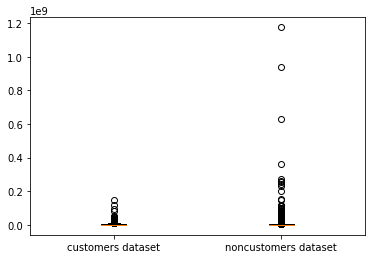

Boxplots for the CNT_EMPLOYEE:


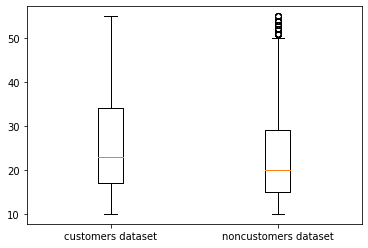

Boxplots for the Mobile_potential:


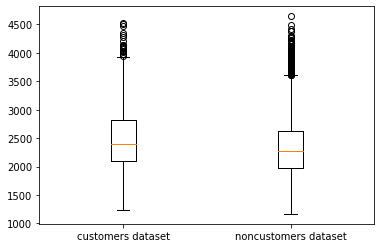

Boxplots for the CNT_CB_DENSITY:


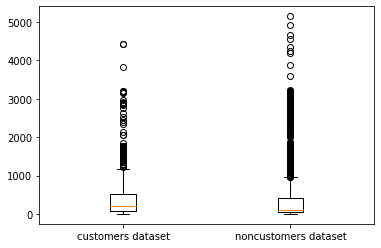

In [373]:
boxplot_columns = ["Revenue", "CNT_EMPLOYEE", "Mobile_potential", "CNT_CB_DENSITY"] # variables of interest

for column in boxplot_columns: # displaying the boxplots for each variable of interest and for both customers and noncustomers dataset
    print(f"{BOLD}Boxplots for the {column}{END}:")
    plt.boxplot([customer_dt[column], noncustomer_dt[column]])
    plt.xticks([1, 2], ['customers dataset', 'noncustomers dataset'])
    plt.show()

As we observe from the boxplots, some of them present outliers. There are several mechanisms to eliminate outliers. One option is to eliminate the values higher than a statistical value for each numerical variable.

[**EX4**] [**CODE**] Remove the values higher than 5* IQR for each variable: `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`and `CNT_CB_FN_DENSITY`. Compare with the boxplot of the previous exercise [**EX3**] and explain the differences.

On the other hand, before applying any classification algorithm, it is necessary to transform non-numerical variables. The most common transformations are **coding as integer** or **coding as dummies**. Before deciding the mechanism it is important to analyze, for each categorical variable, their number of different values and their frequencies. In case of high number of possible values in comparision with the size of the dataset, **dummy** transformation could generate sparse matrix.

In [374]:
def remove_outliers(dataframe, interest_cols, factor):

    output_df = dataframe.copy() # copying the input dataframe so that we don't modify the original
    
    for column in interest_cols:
        q3 = np.percentile(dataframe[column], 75) 
        q1 = np.percentile(dataframe[column], 25) 
        iqr = q3 - q1 # computing iqr, also iqr = iqr(output_df)

        lower_bound = q1 - ( factor * iqr ) 
        upper_bound = q3 + ( factor * iqr )
        
        output_df = output_df[(output_df[column]>= lower_bound) & (output_df[column]<= upper_bound)] # returining the dataframe which lays inside the iqr 
    
    return output_df

For report purposes, we had to calculate the quartiles of Revenue and Mobile_potential

In [375]:
cust_rev_q1 = np.percentile(customer_dt["Revenue"], 25)
cust_rev_q2 = np.percentile(customer_dt["Revenue"], 50)
cust_rev_q3 = np.percentile(customer_dt["Revenue"], 75)

cust_mob_pot_q1 = np.percentile(customer_dt["Mobile_potential"], 25)
cust_mob_pot_q2 = np.percentile(customer_dt["Mobile_potential"], 50)
cust_mob_pot_q3 = np.percentile(customer_dt["Mobile_potential"], 75)

noncust_rev_q1 = np.percentile(noncustomer_dt["Revenue"], 25)
noncust_rev_q2 = np.percentile(noncustomer_dt["Revenue"], 50)
noncust_rev_q3 = np.percentile(noncustomer_dt["Revenue"], 75)

noncust_mob_pot_q1 = np.percentile(noncustomer_dt["Mobile_potential"], 25)
noncust_mob_pot_q2 = np.percentile(noncustomer_dt["Mobile_potential"], 50)
noncust_mob_pot_q3 = np.percentile(noncustomer_dt["Mobile_potential"], 75)

print(f'{BOLD}Customer Revenue Q1:{END} { cust_rev_q1 }{BOLD}; Q2:{END} { cust_rev_q2 }{BOLD}; Q3:{END} { cust_rev_q3 }')
print(f'{BOLD}Customer Mobile potential Q1:{END} { cust_mob_pot_q1 }{BOLD}; Q2:{END} { cust_mob_pot_q2 }{BOLD}; Q3:{END} { cust_mob_pot_q3 }')

print(f'{BOLD}Noncustomer Revenue Q1:{END} { noncust_rev_q1 }{BOLD}; Q2:{END} { noncust_rev_q2 }{BOLD}; Q3:{END} { noncust_rev_q3 }')
print(f'{BOLD}Noncustomer Mobile potential Q1:{END} { noncust_mob_pot_q1 }{BOLD}; Q2:{END} { noncust_mob_pot_q2 }{BOLD}; Q3:{END} { noncust_mob_pot_q3 }')

Customer Revenue Q1: 1047500.0; Q2: 2200000.0; Q3: 4195000.0
Customer Mobile potential Q1: 2090.6967281537; Q2: 2401.464692530968; Q3: 2826.2351826061667
Noncustomer Revenue Q1: 902986.0; Q2: 1750000.0; Q3: 3501123.5
Noncustomer Mobile potential Q1: 1975.5165190653966; Q2: 2277.9727974861535; Q3: 2631.926166103982


In [376]:
interest_cols = ["Revenue", "CNT_EMPLOYEE", "Mobile_potential", "CNT_CB_DENSITY", "CNT_CB_MOB_DENSITY", "CNT_CB_FN_DENSITY"]  # variables of interest
factor = 5 

# Copying the dataframe so that we don't modify the original
customer_dt_no_outliers = customer_dt.copy()
noncustomer_dt_no_outliers  = noncustomer_dt.copy()

print(f'{BOLD}The costumers dataset without outliers looks like:{END}')
customer_dt_no_outliers = remove_outliers(customer_dt_no_outliers, interest_cols, factor)
customer_dt_no_outliers.info()

print(f'\n{BOLD}The noncostumers dataset without outliers looks like:{END}')
noncustomer_dt_no_outliers = remove_outliers(noncustomer_dt_no_outliers, interest_cols, factor)
noncustomer_dt_no_outliers.info()

The costumers dataset without outliers looks like:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 11548 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                1015 non-null   object 
 1   Customer_Flag       1015 non-null   int64  
 2   Revenue             1015 non-null   float64
 3   Sector              1015 non-null   float64
 4   Legal_Form_Code     1015 non-null   float64
 5   CNT_EMPLOYEE        1015 non-null   int64  
 6   CNT_CB_DENSITY      1015 non-null   float64
 7   CNT_CB_MOB_DENSITY  1015 non-null   float64
 8   CNT_CB_FN_DENSITY   1015 non-null   float64
 9   Mobile_potential    1015 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 87.2+ KB

The noncostumers dataset without outliers looks like:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5347 entries, 5 to 11546
Data columns (total 10 columns):
 #   Column            

DATAFRAME WITHOUT OUTLIERS:
Boxplots for the Revenue:


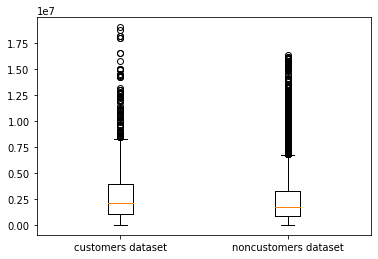

Boxplots for the CNT_EMPLOYEE:


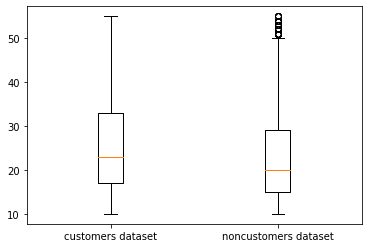

Boxplots for the Mobile_potential:


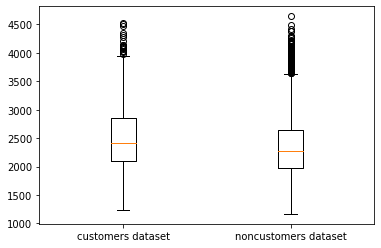

Boxplots for the CNT_CB_DENSITY:


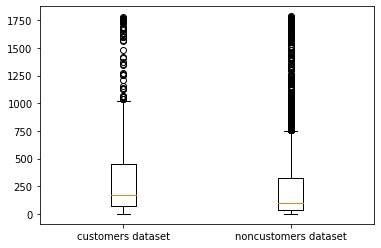

In [377]:
print(f"{BOLD}DATAFRAME WITHOUT OUTLIERS:{END}")

for column in boxplot_columns:
    print(f"{BOLD}Boxplots for the {column}{END}:")
    plt.boxplot([customer_dt_no_outliers[column], noncustomer_dt_no_outliers[column]])
    plt.xticks([1, 2], ['customers dataset', 'noncustomers dataset'])
    plt.show()
    

[**EX5**] [**REPORT**] Calculate the ratio of the values of `City` for `customer_dt` and `noncustomer_dt` datasets. Compare the ratio of each category of each dataset.

In [378]:
# We computed the ratio using value_counts with the normalize mode
# We sorted by ascending order for viewing purposes
ratio_customer_revenue = customer_dt_no_outliers['City'].value_counts(normalize = True, sort = True)
ratio_noncustomer_revenue = noncustomer_dt_no_outliers['City'].value_counts(normalize = True, sort = True)

print(f"{BOLD}Customer:{END}\n{ratio_customer_revenue}\n\n{BOLD}Noncustomer:{END}\n{ratio_noncustomer_revenue}")

Customer:
München       0.024631
Köln          0.021675
Berlin        0.016749
Chemnitz      0.016749
Dresden       0.015764
                ...   
Bad Abbach    0.000985
Lichtenau     0.000985
Ottobrunn     0.000985
Moosburg      0.000985
Wedemark      0.000985
Name: City, Length: 578, dtype: float64

Noncustomer:
München                  0.020759
Köln                     0.016084
Stuttgart                0.010099
Bremen                   0.009538
Dortmund                 0.009351
                           ...   
Rechtmehring             0.000187
Heilbad Heiligenstadt    0.000187
Edermünde                0.000187
Knüllwald                0.000187
Solms                    0.000187
Name: City, Length: 2215, dtype: float64


In [379]:
# Computing the ratio for the other variables of the datasets
for col in customer_dt_no_outliers:
    if col != "City":
        print(f"{BOLD}COLUMN: {col}{END}")
        ratio_customer_ = customer_dt_no_outliers[col].value_counts(normalize = True, sort = True)
        ratio_noncustomer_ = noncustomer_dt_no_outliers[col].value_counts(normalize = True, sort = True)

        print(f"{BOLD}Customer:{END}\n{ratio_customer_}\n\n{BOLD}Noncustomer:{END}\n{ratio_noncustomer_}\n\n")

COLUMN: Customer_Flag
Customer:
1    1.0
Name: Customer_Flag, dtype: float64

Noncustomer:
0    1.0
Name: Customer_Flag, dtype: float64


COLUMN: Revenue
Customer:
1000000.0    0.021675
3000000.0    0.020690
2000000.0    0.020690
2200000.0    0.015764
1200000.0    0.015764
               ...   
3250050.0    0.000985
415000.0     0.000985
3129196.0    0.000985
730000.0     0.000985
1988000.0    0.000985
Name: Revenue, Length: 508, dtype: float64

Noncustomer:
1000000.0    0.033290
1500000.0    0.032355
2000000.0    0.023565
1200000.0    0.020946
2500000.0    0.016084
               ...   
1250.0       0.000187
33951.0      0.000187
2541222.0    0.000187
2042995.0    0.000187
4593054.0    0.000187
Name: Revenue, Length: 1791, dtype: float64


COLUMN: Sector
Customer:
40.0    0.154680
42.0    0.087685
47.0    0.054187
44.0    0.049261
63.0    0.046305
          ...   
7.0     0.000985
46.0    0.000985
10.0    0.000985
52.0    0.000985
37.0    0.000985
Name: Sector, Length: 71, dtype: floa

As the number of distinct values is high, we will apply a **integer** encoding through the LabelEncoder() transformation as follows:

In [380]:
City_Categ = customer_dt_no_outliers['City'].append(noncustomer_dt_no_outliers['City'])
City_Categ.head()

C:\Users\Usuari\AppData\Local\Temp\ipykernel_2324\2200363049.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  City_Categ = customer_dt_no_outliers['City'].append(noncustomer_dt_no_outliers['City'])


11548         Haar
11551      Greding
11553        Dörth
11554    Frankfurt
11565    Benningen
Name: City, dtype: object

In [381]:
city_encoder = LabelEncoder()
city_encoder.fit(City_Categ.values)

# Applying city encoder transformation
customer_dt_no_outliers['City_coded'] = city_encoder.transform(customer_dt_no_outliers['City'].values)
noncustomer_dt_no_outliers['City_coded'] = city_encoder.transform(noncustomer_dt_no_outliers['City'].values)

# Erasing the city column as City_coded has already been appended
no_city_cust = customer_dt_no_outliers.drop("City", axis = 1)
no_city_noncust = noncustomer_dt_no_outliers.drop("City", axis = 1)

In [382]:
no_city_cust.head

<bound method NDFrame.head of        Customer_Flag     Revenue  Sector  Legal_Form_Code  CNT_EMPLOYEE  \
11548              1   4000000.0    42.0             14.0            17   
11551              1  11780000.0    74.0              4.0            53   
11553              1   2050000.0    43.0             14.0            16   
11554              1    853500.0    63.0             14.0            14   
11565              1  10680000.0    74.0              4.0            17   
...              ...         ...     ...              ...           ...   
13306              1   3535693.0    71.0             14.0            20   
13307              1   1462624.0    40.0             14.0            15   
13312              1   1200000.0    55.0             14.0            13   
13314              1   1830000.0    27.0             14.0            26   
13321              1   1988000.0    24.0             14.0            19   

       CNT_CB_DENSITY  CNT_CB_MOB_DENSITY  CNT_CB_FN_DENSITY  \
11548

In [383]:
no_city_noncust.head

<bound method NDFrame.head of        Customer_Flag    Revenue  Sector  Legal_Form_Code  CNT_EMPLOYEE  \
5                  0  8500000.0    59.0             14.0            27   
6                  0  2100000.0    73.0             20.0            37   
8                  0   630000.0    56.0             14.0            13   
13                 0  8000000.0    47.0              4.0            48   
19                 0  5160000.0    74.0              4.0            13   
...              ...        ...     ...              ...           ...   
11542              0  6391606.0    60.0             20.0            24   
11543              0   305000.0    60.0              4.0            13   
11544              0  4200000.0    23.0             14.0            54   
11545              0  1336495.0    60.0             16.0            20   
11546              0  4593054.0    64.0             14.0            44   

       CNT_CB_DENSITY  CNT_CB_MOB_DENSITY  CNT_CB_FN_DENSITY  \
5               8

[**EX5**] [**CODE**] Finally before entering in the training stage,  let's create a `final_dataset` that is the result of stacking `customer_dt`and `noncustomer_dt`considering the following variables: `City_coded`, `Revenue`, `Sector`, `Legal_Form_Code`, `CNT_EMPLOYEE`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`, `CNT_CB_FN_DENSITY`and `Mobile_potential`. The 'final_dataset' should include a new variable, `Target`, that takes value **0** for noncustomers and **1** for customers registers. The `Target` will distiguish the two classes to train the model.

The output should look like this:

In [384]:
# Adding the new variable
no_city_cust.rename(columns = {'Customer_Flag':'Target'}, inplace = True)
no_city_noncust.rename(columns = {'Customer_Flag':'Target'}, inplace = True)

final_dataset_no_outliers = no_city_cust.append(no_city_noncust) # Appending noncustomers dataset to customers one
final_dataset_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362 entries, 11548 to 11546
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Target              6362 non-null   int64  
 1   Revenue             6362 non-null   float64
 2   Sector              6362 non-null   float64
 3   Legal_Form_Code     6362 non-null   float64
 4   CNT_EMPLOYEE        6362 non-null   int64  
 5   CNT_CB_DENSITY      6362 non-null   float64
 6   CNT_CB_MOB_DENSITY  6362 non-null   float64
 7   CNT_CB_FN_DENSITY   6362 non-null   float64
 8   Mobile_potential    6362 non-null   float64
 9   City_coded          6362 non-null   int32  
dtypes: float64(7), int32(1), int64(2)
memory usage: 521.9 KB


C:\Users\Usuari\AppData\Local\Temp\ipykernel_2324\2491393095.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dataset_no_outliers = no_city_cust.append(no_city_noncust) # Appending noncustomers dataset to customers one


In [385]:
final_dataset_no_outliers.head()

,Target,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,City_coded
11548,1,4000000.0,42.0,14.0,17,891.0,867.0,62.0,1846.104451,814
11551,1,11780000.0,74.0,4.0,53,7.0,7.0,0.0,2083.941040,749
11553,1,2050000.0,43.0,14.0,16,30.0,30.0,1.0,2209.827333,460
11554,1,853500.0,63.0,14.0,14,870.0,842.0,77.0,2401.464693,614
11565,1,10680000.0,74.0,4.0,17,319.0,317.0,10.0,2579.765989,218


In [386]:
final_dataset_no_outliers.tail()

,Target,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,City_coded
11542,0,6391606.0,60.0,20.0,24,57.0,57.0,0.0,2102.700888,761
11543,0,305000.0,60.0,4.0,13,9.0,9.0,0.0,1548.889725,1936
11544,0,4200000.0,23.0,14.0,54,62.0,62.0,6.0,2388.407248,618
11545,0,1336495.0,60.0,16.0,20,63.0,61.0,2.0,2657.602909,1983
11546,0,4593054.0,64.0,14.0,44,90.0,90.0,5.0,2126.540797,1021


To measure the quality of our classifiers, it is necessary to train and test the models with different datasets. For this objective we will use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to generate 4 new datasets: 2 for training and 2 for test: 
- `X_train`: contains all variables except `Target` for the 80% of `final_dataset`,
- `y_train`: contains `Target`variables for the 80% of `final_dataset`, 
- `X_test`: contains all variables except `Target` for the 20% of `final_dataset`,
- `y_test`: contains `Target`variables for the 20% of `final_dataset`.

In [387]:
no_targ_final = final_dataset_no_outliers.drop("Target", axis = 1) # dataset without target for X variables
X_train, X_test, y_train, y_test = train_test_split (no_targ_final, final_dataset_no_outliers["Target"], test_size=0.33, random_state=42) 

[**EX6**] [**REPORT**] Calculate the lenght of `X_train` and `X_test` datasets. Is it aligned with the `test_size`value selected in the split?

In [388]:
# Computing lengths
X_train_size = len(X_train)
X_test_size = len(X_test)
f_dat_size = len(final_dataset_no_outliers)

# Comparing the lengths
diff = abs(f_dat_size* 0.33 - X_test_size)
threshhold = 1

if diff <= threshhold:
    print(f"{BOLD}The datasets have the same size, or a similar one (+-{threshhold}){END}\n")
else:
    print(f"{BOLD}The sizes are too different!{END}")

# Computing the final size of the datset
sum = X_test_size + X_train_size
    
print(f"{BOLD}The sum of the two splitted datasets is:{END} {X_train_size}{BOLD} + {END}{X_test_size}{BOLD} = {END}{sum}")
print(f"{BOLD}The size of the final dataset is:{END} {f_dat_size}\n")
if sum == f_dat_size:
    print(f"{BOLD}The two datasets have the same size!{END}")
else:
    print(f"{BOLD}The two datasets don't have the same size :({END}")

The datasets have the same size, or a similar one (+-1)

The sum of the two splitted datasets is: 4262 + 2100 = 6362
The size of the final dataset is: 6362

The two datasets have the same size!


The importance is not in the sizes, the keypoint is the personality of each individual

In [389]:
print(X_train)

          Revenue  Sector  Legal_Form_Code  CNT_EMPLOYEE  CNT_CB_DENSITY  \
10741  12800000.0    42.0             16.0            41           138.0   
5247     600000.0    85.0             14.0            16            17.0   
9893    1328000.0    55.0             14.0            10            75.0   
6840     800000.0    40.0              4.0            13             7.0   
12475    900000.0    82.0             20.0            23           219.0   
...           ...     ...              ...           ...             ...   
4622    1018142.0    43.0             31.0            11           183.0   
7361     300000.0    82.0             14.0            19            63.0   
7423     600000.0    31.0             14.0            14           414.0   
7763    2044402.0    55.0             14.0            25           193.0   
12827    957000.0    68.0             14.0            10             7.0   

       CNT_CB_MOB_DENSITY  CNT_CB_FN_DENSITY  Mobile_potential  City_coded  
10741     

[**EX7**] [**REPORT**] Draw the histograms of `y_train`and `y_test`. Is the dataset balanced (similar number of rows for each class or Target) or imbalanced ? How do you think it could affect to quality of the classifier?

The number of rows with Target value 0 is: 3590, while there are 672 rows with Target 1


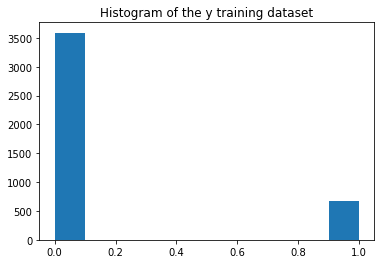

The number of rows with Target value 0 is: 1757, while there are 343 rows with Target 1


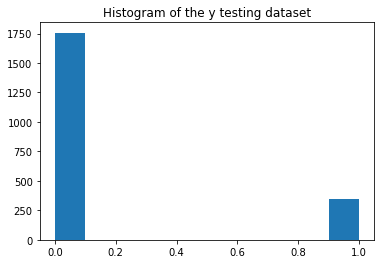

In [390]:
num_0_train = 0
for el in y_train:
    num_0_train += el
print(f"The number of rows with Target value 0 is: {len(y_train) - num_0_train}, while there are {num_0_train} rows with Target 1")

plt.hist(y_train)
plt.title('Histogram of the y training dataset')
plt.show()

num_0_test = 0
for el in y_test:
    num_0_test += el
print(f"The number of rows with Target value 0 is: {len(y_test) - num_0_test}, while there are {num_0_test} rows with Target 1")
plt.hist(y_test)
plt.title('Histogram of the y testing dataset')
plt.show()

# 2. Model Training: from baseline models to ensemble¶

Now we are ready to enter in the training stage of the machine learning models. The common way to procedure is starting with baseline models (i.e. SVM, Decision Trees, Naive Bayes, etc....) and later, try to improve it adjusting hyperparameters of the models or creating more complex models architectures as ensembles.

## 2.1. Baseline of models: Training and evaluation

In the following section we are training a SVM, Decision Tree and Naive Bayes algorithms. To do it, we will use the `X_train`and `y_train`datasets.
Later on we will evaluate the performance (i.e. **accuracy**, **confusion matrix**, **recall** and **precision**) of each model with the `test`dataset, i.e. `X_test`and `y_test`.


Tip 1: You may use [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from Sklearn library to calculate the **precision**, **recall** of the model.

Tip 2: You may use [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from Sklearn library to calculate the confusion matrix of a model.

Tip 3: When using Sklearn library, you may use the function **.score(X_test, y_test)** to calculate the accuracy value.

### Classification with a SVM model

[**EX8**] [**CODE**] Train the SVM classifier of the Sklearn library. Evaluate the following metrics for kernel="rbf":
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is the algorithm classifying both classes (Target=0 and Target=1) in a similar way? Why?
- Compare the **precision** and **recall** of the **training** dataset (i.e.`X_train`and `y_train`) vs the **test** dataset (i.e. `X_test`and `y_test`). Which is better? Why? Which is the correct measure to estimate the performance for other unseen datasets? Why?

In [391]:
# Training the SVM model with the train datasets
clf_train = SVC(kernel='rbf')
clf_train.fit(X_train, y_train)

# Testing the model and then calculating the confusion matrix
svc_predictions_train = clf_train.predict(X_test)
print(f"{BOLD}The confusion matrix of the model trained with the train datasets:{END}\n{confusion_matrix(y_test, svc_predictions_train)}\n")

# Check the precision and recall of the training dataset
print(f"{BOLD}The precision and recall of the training dataset:{END}\n{classification_report(y_test, svc_predictions_train)}")

# Last let's compute the accuracy values
accuracy_scores_train = clf_train.score(X_test, y_test)
print(accuracy_scores_train)

The confusion matrix of the model trained with the train datasets:
[[1757    0]
 [ 342    1]]

The precision and recall of the training dataset:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1757
           1       1.00      0.00      0.01       343

    accuracy                           0.84      2100
   macro avg       0.92      0.50      0.46      2100
weighted avg       0.86      0.84      0.76      2100

0.8371428571428572


### Classification with a Decision Tree model

[**EX9**] [**CODE**] Train the Decision Tree algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Decision Tree algorithm working better than SVM? Why?

In [392]:
# Training the Decision Tree model with the train datasets
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train, y_train)

# Testing the model and then calculating the confusion matrix
dec_tree_predictions = dec_tree_model.predict(X_test)
print(f"{BOLD}The confusion matrix of the Decision Tree model:{END}\n{confusion_matrix(y_test, dec_tree_predictions)}\n")

# Check the precision and recall of the training dataset
print(f"{BOLD}The precision and recall of the training dataset:{END}\n{classification_report(y_test, dec_tree_predictions)}")

The confusion matrix of the Decision Tree model:
[[1473  284]
 [ 258   85]]

The precision and recall of the training dataset:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1757
           1       0.23      0.25      0.24       343

    accuracy                           0.74      2100
   macro avg       0.54      0.54      0.54      2100
weighted avg       0.75      0.74      0.75      2100



### Comparing algorithm consistenly: KFold cross-validation

When we are looking for the best algorithm to classify a dataset, it is very useful to compare all of them. Besides, to protect the training from **overfitting** and calculate the performance with less variance than a single train-test split, it is uselful to apply **K-Fold cross-validation**. The way that KFolds works is splitting the dataset into k-parts or **fold** (e.g. k = 3, 5 or k = 10). The algorithm is trained on k − 1 folds with one held back and tested on the held back fold.

[**EX10**] [**CODE**] Train a SVM and Decision Tree algorithms using a KFold cross-validation with **k=5** and calculate the **mean** and **standard deviation** of the **accuracy**. Plot a boxplot of the accuracy for every model. Which is the model with better mean value of the accuracy? Which is the algorithm with less deviation on the accuracy?  

Tip 1: You may use [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to apply cross-validation.

In [393]:
# Models definition
models=[]
models.append(('SVM', SVC()))
models.append(('Decision Trees', DecisionTreeClassifier()))

# Evaluate each models
results=[]
names=[]
scoring_metric='accuracy'
splits = [3,5,10]

for name_model, model in models:
    kfold= KFold(n_splits=5)
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    results.append(cv_results)
    names.append(name_model)
    print(f"{BOLD}Model {name_model} with accuracy (mean):{END} {cv_results.mean()} {BOLD}and accuracy (std):{END} {cv_results.std()}")
    

Model SVM with accuracy (mean): 0.8435004320569763 and accuracy (std): 0.009022668656125105
Model Decision Trees with accuracy (mean): 0.7555146431539609 and accuracy (std): 0.006377509843118639


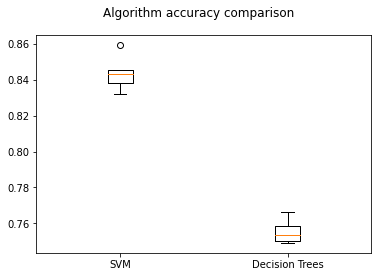

In [394]:
# Diplaying the accuracy boxplot of both models
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The output of the boxplots should look like this:

## 2.2 Improving the model

As we observe from the baseline models, even though the accuracy is over 70% the classifiers don't distinguish properly both classes, i.e. **Target=1** and **Target=0**.  
In this scenario, we should apply another strategies to improve the perfomance. There are several options: from adjusting the balance of the classes or doing the fine tuning of the hyperparameters of the models (for instance the type of kernel in SVM or the minimum number of samples per leaf in Decision Tree) to combine differents models to create ensembles.
In this section, we will evaluate our classifiers in two ways:
- Forcing the balancing of both classes
- Building ensembles of models

### Balancing the dataset

Let's check the type of balancing we have in our training and test datasets.

[**EX11**][**CODE**] Split the previous `final_dataset`in two datasets: `customer_dt` for class 1 and `noncustomer_dt`for class 0. Calculate the number of samples for the **customers** class (i.e. Target=1) and for the **noncustomers** class (i.e. Target=0). Is the `final_dataset`balanced or imbalanced? Explain two options to match both datasets.


Let's undersample the `noncustomer_dt` to balance both datasets:

In [395]:
# Spliting the dataset into customers and noncustomers datasets
customer_dt = final_dataset_no_outliers[final_dataset_no_outliers['Target'] == 1]
noncustomer_dt = final_dataset_no_outliers[final_dataset_no_outliers['Target'] == 0]

# Undersampling the noncustomers dataset
noncustomer_dt_sample=noncustomer_dt.sample(840)
print("The new number of samples in noncustomer dataset is:", len(noncustomer_dt_sample))

The new number of samples in noncustomer dataset is: 840


If we append both datasets, the **customer_dt** and the **noncustomer_dt_sample**, the new `final_dataset`looks like:

C:\Users\Usuari\AppData\Local\Temp\ipykernel_2324\1730445038.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dataset_eq = customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis=1)


<AxesSubplot:>

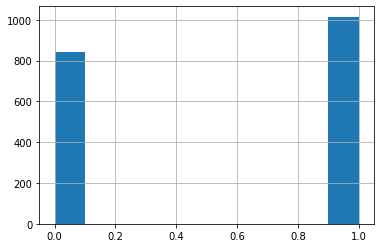

In [396]:
final_dataset_eq = customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis=1)
final_dataset_eq = final_dataset_eq.loc[:,['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential','Target']]
final_dataset_eq.Target.hist()

[**EX12**][**CODE**][**REPORT**] Train a SVC and Decision Tree algorithm with the new `final_dataset`. Evaluate the **recall**, **precision** and **confusion matrix** of all 2 models.
- Which has better accuracy?
- Which is the model with better recall? And accuracy?
- Which model you recommend to classify both classes? Justify your answer

In [397]:
no_targ_final = final_dataset_eq.drop("Target", axis = 1)  # dataset without target for X variables
X_train, X_test, y_train, y_test = train_test_split (final_dataset_eq.iloc[:,:-1], final_dataset_eq.iloc[:,-1], test_size=0.33, random_state=42) 

In [398]:
# Training the SVC model with the train datasets
clf_train = SVC(kernel='rbf')
clf_train.fit(X_train, y_train)

# Testing the model and then calculating the confusion matrix
svc_predictions_train = clf_train.predict(X_test)
print(f"{BOLD}The confusion matrix of the model trained with the train datasets:{END}\n {confusion_matrix(y_test, svc_predictions_train)}\n")

# Check the precision and recall of the training dataset
print(f"{BOLD}The precision and recall of the training dataset:{END} \n{classification_report(y_test, svc_predictions_train)}")

# Last let's compute the accuracy and recall values
accuracy_scores_train = clf_train.score(X_test, y_test)
print(accuracy_scores_train)

The confusion matrix of the model trained with the train datasets:
 [[  0 270]
 [  0 343]]

The precision and recall of the training dataset: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       270
           1       0.56      1.00      0.72       343

    accuracy                           0.56       613
   macro avg       0.28      0.50      0.36       613
weighted avg       0.31      0.56      0.40       613



c:\Users\Usuari\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuari\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuari\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

0.5595432300163132


In [399]:
# Training the Decision Tree model with the train datasets
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train, y_train)

# Testing the model and then calculating the confusion matrix
dec_tree_predictions = dec_tree_model.predict(X_test)
print(f"{BOLD}The confusion matrix of the Decision Tree model:{END}\n{confusion_matrix(y_test, dec_tree_predictions)}\n")

# Check the precision and recall of the training dataset
print(f"{BOLD}The precision and recall of the training dataset:{END}\n{classification_report(y_test, dec_tree_predictions)}")

# Last let's compute the accuracy and recall values
accuracy_scores_train = clf_train.score(X_test, y_test)
print(accuracy_scores_train)

The confusion matrix of the Decision Tree model:
[[127 143]
 [137 206]]

The precision and recall of the training dataset:
              precision    recall  f1-score   support

           0       0.48      0.47      0.48       270
           1       0.59      0.60      0.60       343

    accuracy                           0.54       613
   macro avg       0.54      0.54      0.54       613
weighted avg       0.54      0.54      0.54       613

0.5595432300163132


### Ensembling models

Another mechanism to improve the performance of a classifier is to combine several algorithms. The three most popular methods for combining models are:
- Bagging combines multiple models that are trained with different subsamples of the training dataset.
- Boosting combines multiple models in cascade and each of them learns to fix the prediction errors of the prior model.
- Voting combines statistically the output of several models.

Usually Bagging and Boosting are formed by models of the same type meanwhile voting could be formed by different models.

### Voting ensemble

[**EX13**][**CODE**][**REPORT**] Build a **voting** ensemble formed by a SVM and Decision Tree and train it with the balanced training dataset. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to build this type of ensemble.

In [400]:
# Models definition
svc_model = SVC()
dec_tree = DecisionTreeClassifier()

estimators_ex13 = [("SVC",svc_model), ("DTC", dec_tree )]
vc = VotingClassifier(estimators_ex13) # Building the voting classifier
vc.fit(X_train, y_train)

# Computing paramaters of the classifier
vc_predicts = vc.predict(X_test)
vc_prec = precision_score(y_test, vc_predicts)
vc_recall = recall_score(y_test, vc_predicts)

print(f"{BOLD}The precision of the voting classifier is:{END} {vc_prec}")
print(f"{BOLD}The recall of the voting classifier is:{END} {vc_recall}")
print(f"{BOLD}The confusion matrix of the Decision Tree model:{END}\n{confusion_matrix(y_test, vc_predicts)}\n")

The precision of the voting classifier is: 0.5854341736694678
The recall of the voting classifier is: 0.60932944606414
The confusion matrix of the Decision Tree model:
[[122 148]
 [134 209]]



### Bagging ensemble: Random Forest

[**EX14**][**CODE**][**REPORT**] Build a **Bagging** ensemble based on Random Forest. Random Forest is considered a bagging ensemble formed by Decision Trees algorithms. Train the Random Forest with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to build this type of ensemble.

In [401]:
# Building the random forest
random_forest = RandomForestClassifier() #Since we have no comments regarding the parameters, we considered we had to use the deffault ones.
random_forest.fit(X_train, y_train)

# Computing paramaters of the classifier
rf_predicts = random_forest.predict(X_test)
rf_prec = precision_score(y_test, rf_predicts)
rf_recall = recall_score(y_test, rf_predicts)

print(f"{BOLD}The precision of the voting classifier is:{END} {rf_prec}")
print(f"{BOLD}The recall of the voting classifier is:{END} {rf_recall}")
print(f"{BOLD}The confusion matrix of the Decision Tree model:{END}\n {confusion_matrix(y_test, rf_predicts)}\n")

The precision of the voting classifier is: 0.6297297297297297
The recall of the voting classifier is: 0.6793002915451894
The confusion matrix of the Decision Tree model:
 [[133 137]
 [110 233]]



[**EX15**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the Random Forest model for class 0 and class 1.

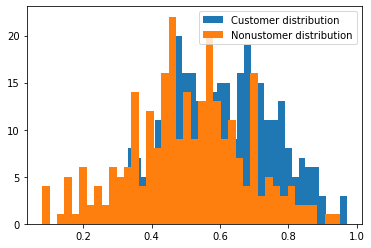

In [402]:
probabilities_of_prediction = random_forest.predict_proba(X_test) # Getting the probabilities
probabilities_of_prediction = np.append(probabilities_of_prediction[:, 1].reshape(-1,1), np.asarray(y_test).reshape(-1,1), axis = 1) # Appending the target variable so that we can separate both classes

# With this code we aim to split our dataset into two splits, one where we predict they are customers, and another where we predict they are not
probabilities_of_prediction_customers = probabilities_of_prediction[probabilities_of_prediction[:, 1] == 1]
probabilities_of_prediction_noncustomers = probabilities_of_prediction[probabilities_of_prediction[:, 1] == 0]

# We selected the number of bins to be 40 to get a more informative histogram than the base one, which only had 10 bins
plt.hist(probabilities_of_prediction_customers[:, 0], bins = 40) 
plt.hist(probabilities_of_prediction_noncustomers[:, 0], bins = 40)
plt.legend(['Customer distribution', 'Nonustomer distribution'])
plt.show()

### Boosting ensemble: Gradient Tree Boosting

[**EX16**][**CODE**][**REPORT**] Build a **Boosting** ensemble based on Gradient Tree Boosting (GBT). There are several boosting algorithms as Adaboost, etc.  Train the GBT with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to build this type of ensemble.

In [403]:
# Building the random forest
GBT = GradientBoostingClassifier()
GBT.fit(X_train, y_train)

# Computing paramaters of the classifier
gbt_predicts = GBT.predict(X_test)
gbt_prec = precision_score(y_test, gbt_predicts)
gbt_recall = recall_score(y_test, gbt_predicts)

print(f"{BOLD}The precision of the voting classifier is:{END} {gbt_prec}")
print(f"{BOLD}The recall of the voting classifier is:{END} {gbt_recall}")
print(f"{BOLD}The confusion matrix of the Decision Tree model:{END}\n{confusion_matrix(y_test, gbt_predicts)}\n")

The precision of the voting classifier is: 0.6435897435897436
The recall of the voting classifier is: 0.7317784256559767
The confusion matrix of the Decision Tree model:
[[131 139]
 [ 92 251]]



[**EX17**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the GBT model for class 0 and class 1. Compare it with histogram of Random Forest. Which one classifies better from your point of view? Why? 

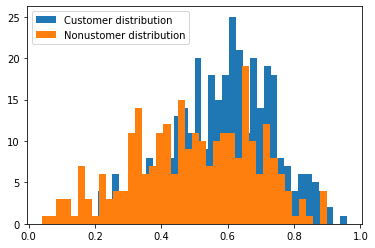

In [404]:
probabilities_of_prediction = GBT.predict_proba(X_test)  # Getting the probabilities
probabilities_of_prediction = np.append(probabilities_of_prediction[:, 1].reshape(-1,1), np.asarray(y_test).reshape(-1,1), axis = 1) # Appending the target variable so that we can separate both classes

# Separating both classes
probabilities_of_prediction_customers = probabilities_of_prediction[probabilities_of_prediction[:, 1] == 1]
probabilities_of_prediction_noncustomers = probabilities_of_prediction[probabilities_of_prediction[:, 1] == 0]

plt.hist(probabilities_of_prediction_customers[:, 0], bins = 40) 
plt.hist(probabilities_of_prediction_noncustomers[:, 0], bins = 40)
plt.legend(['Customer distribution', 'Nonustomer distribution'])
plt.show()

# 3. Creating a Business opportunity with Machine Learning

The cut-off is the **threshold of the probability of the prediction** to assign to class 0 or class 1 the prediction. If probability > cut-off, the model classifies as 1; otherwise, model classifies as 0. 
The cut-off is a value that can be adjusted to increase the recall or the precision. Usually, there is a **trade-off** between improving the recall-precision.

[**EX18**][**CODE**][**REPORT**] Execute the prediction for the selected model. Adjust the cutoff value to optimize the classifier if you consider necessary. How many **non customers** are you going to send to the sales managers to sell our products to them?




In [405]:
model_GBT = GradientBoostingClassifier()
model_GBT.fit(X_train, y_train)
GBT_preds = (model_GBT.predict_proba(X_test)[:,1] >= 0.65).astype(bool)#Trying to maximize 0s

recall_0 = confusion_matrix(y_test, GBT_preds)[0][0] / ( confusion_matrix(y_test, GBT_preds)[0][0] + confusion_matrix(y_test, GBT_preds)[0][1] )
recall_1 = confusion_matrix(y_test, GBT_preds)[1][1] / ( confusion_matrix(y_test, GBT_preds)[0][1] + confusion_matrix(y_test, GBT_preds)[1][1] )
prec_0 = confusion_matrix(y_test, GBT_preds)[0][0] / ( confusion_matrix(y_test, GBT_preds)[0][0] + confusion_matrix(y_test, GBT_preds)[1][0] )
prec_1 = confusion_matrix(y_test, GBT_preds)[1][1] / ( confusion_matrix(y_test, GBT_preds)[0][1] + confusion_matrix(y_test, GBT_preds)[1][1] )

print("Maximizing the noncustomers to avoid losing time and money")
print(f"{BOLD}The confusion matrix of the Decision Tree model:{END}\n{confusion_matrix(y_test, GBT_preds)}\n")
print(f"Recall of 0: {recall_0}")
print(f"Recall of 1: {recall_1}")
print(f"Precision of 0: {prec_0}")
print(f"Precision of 1: {prec_1}")

Maximizing the noncustomers to avoid losing time and money
The confusion matrix of the Decision Tree model:
[[206  64]
 [219 124]]

Recall of 0: 0.762962962962963
Recall of 1: 0.6595744680851063
Precision of 0: 0.48470588235294115
Precision of 1: 0.6595744680851063


Usually, Marketing department needs to know and understand the main features of the algorithms. The code below returns the importance of each feature of the `training_dataset`.

In [406]:
features=['City_coded','Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENS', 'Mobile_potential']
features_values=model_GBT.feature_importances_
features_importance=[]
for i in range (len(features)):
    features_importance.append([features[i],features_values[i]])
print(features_importance)

[['City_coded', 0.15153327506335337], ['Revenue', 0.14509039670659993], ['Sector', 0.08696882272731059], ['Legal_Form_Code', 0.09035694525112552], ['CNT_EMPLOYEE', 0.08884147585065347], ['CNT_CB_DENSITY', 0.1634651162593899], ['CNT_CB_MOB_DENSITY', 0.04451359245566498], ['CNT_CB_FN_DENS', 0.042867445634443], ['Mobile_potential', 0.18636293005145926]]


[**EX19**][**CODE**][**REPORT**] Order the features by importance. Which are the top 3 features to discriminate between **non customers** and **customers**?

In [407]:
to_sort_f = features_importance
sorted_f = []
new_arr = []
it = 1
while len(new_arr) < len(to_sort_f):
    new_max = 0
    max_el = None
    for el in to_sort_f:
        if el[1] >= new_max and el not in new_arr:
            new_max = el[1]
            max_el = el
    print(f"{BOLD}Position {it}:{END} {max_el}")
    new_arr.append(max_el)
    it+=1
    

Position 1: ['Mobile_potential', 0.18636293005145926]
Position 2: ['CNT_CB_DENSITY', 0.1634651162593899]
Position 3: ['City_coded', 0.15153327506335337]
Position 4: ['Revenue', 0.14509039670659993]
Position 5: ['Legal_Form_Code', 0.09035694525112552]
Position 6: ['CNT_EMPLOYEE', 0.08884147585065347]
Position 7: ['Sector', 0.08696882272731059]
Position 8: ['CNT_CB_MOB_DENSITY', 0.04451359245566498]
Position 9: ['CNT_CB_FN_DENS', 0.042867445634443]


  [**EX20**][**REPORT**] In this project, we have used classification techniques to identify potential customers. We have adjusted the main classification parameters as cutoff, recall and precision according to the final purpose: in out case, identify **non customers** that could be interested to buy our products. Consider a new campaign focused on accelerating the sales of a **New IoT tariff** to our customers. Answer the following questions:
- In this case, which is the **target** variable? Which are **target=0** samples? And **target=1**?
- As the marketing campaing is oriented to our customers we will have further information about them in our internal systems. In particular, we could add to the information of the previous section 3 new variables: data and voice consumption and mobile expense. Adding more data to the dataset may imply more computational data and cost. Would you add these 3 new variables to dataset? Justify your answer.
- Today this New IoT tariff is very popular among our customers. Will the training dataset be balanced or unbalanced? Justify your answer.

Imagine the following scatter plot (`Number of IoT devices (units)` vs `Number of IoT applications (units)`):

![<scatter_plot>](scatter_plot.png)
- Describe in terms of `Number of IoT devices (units)` and `Number of IoT applications (units)` the **pattern** of target 1 customers
- Draw a plane to separate both classes
- Is the training dataset balanced? Justiy your answer
- According to the previous plane, which are the customers to be phoned to sell the New IoT tariff?
- Could you estimate the **precision** and **recall** of the classification?

*******

# Deliver

Deliver:

* A zip file containing your notebook (.ipynb file) with all the [**CODE**] parts implemented.
* A 5-pages PDF report including all parts of this notebook marked with "[**REPORT**]"

The report should end with the following statement: **We hereby declare that, except for the code provided by the course instructors, all of our code, report, and figures were produced by ourselves.**